In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
import os

In [3]:
import matplotlib.pyplot as plt


In [4]:
filename = "TRAIN.csv"

In [5]:
homedir = os.path.abspath(os.path.dirname("__name__"))

In [6]:
fp = os.path.join(homedir, filename)

In [7]:
df = pd.read_csv(fp)

In [8]:
df.shape

(188340, 10)

In [9]:
df.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object

In [10]:
df.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [11]:
df.isna().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [12]:
df['StoreCat'] = df['Store_Type'] + df['Location_Type'] + df['Region_Code']

In [13]:
# df['Holiday'] = df['Holiday'].astype('category')
# df['Store_id'] = df['Store_id'].astype('category')
# df['Store_Type'] = df['Store_Type'].astype('category')
# df['Location_Type'] = df['Location_Type'].astype('category')
# df['Region_Code'] = df['Region_Code'].astype('category')
# df['Discount'] = df['Discount'].astype('category')

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df['StoreCat'].nunique()

50

In [16]:
storecatdf = df.groupby(['StoreCat']).agg({"Sales":np.mean}).reset_index().rename(columns={"Sales":"StoreCatAvg"})

In [17]:
storecatdf.columns

Index(['StoreCat', 'StoreCatAvg'], dtype='object')

In [18]:
storeiddf = df.groupby(["Store_id"]).agg({"Sales":np.mean}).reset_index().rename(columns={"Sales":"StoreAvg"})

In [19]:
storeidcatdf = df[['Store_id', 'StoreCat']]

In [20]:
storeidcatdf.drop_duplicates(inplace=True)

<ipython-input-20-27ce2c1e2e26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  storeidcatdf.drop_duplicates(inplace=True)


In [21]:
storeidcatdf = pd.merge(storeidcatdf, storeiddf, on="Store_id", how="left")

In [22]:
storeidcatdf = pd.merge(storeidcatdf, storecatdf, on="StoreCat", how="left")

In [23]:
storeidcatdf.head()

,Store_id,StoreCat,StoreAvg,StoreCatAvg
0,1,S1L3R1,34698.442326,34440.891346
1,253,S4L2R1,54738.257151,66821.158023
2,252,S3L2R1,51991.910872,52003.152718
3,251,S2L3R1,31343.428779,31343.428779
4,250,S2L3R4,29409.917209,29096.769151


In [24]:
storeidcatdf['Diff'] = storeidcatdf['StoreAvg'] - storeidcatdf['StoreCatAvg']

In [25]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [26]:
df['Year'] = df['Year'].astype('category')
df['Month'] = df['Month'].astype('category')

In [27]:
df['DayOfWeek'].value_counts()

0    27010
1    27010
2    27010
3    27010
4    27010
5    26645
6    26645
Name: DayOfWeek, dtype: int64

In [28]:
dayOfWeekDict = {0:"Monday",
                 1:"Tuesday",
                 2:"Wednesday",
                 3:"Thursday",
                 4:"Friday",
                 5:"Saturday",
                 6:"Sunday"}

In [29]:
df['DayOfWeek'] = df['DayOfWeek'].apply(lambda x : dayOfWeekDict.get(x))

In [30]:
df2 = df[['Store_id', "StoreCat", "Date", "DayOfWeek", "Holiday", "Discount", "#Order", "Sales"]]

In [31]:
df2.head()

,Store_id,StoreCat,Date,DayOfWeek,Holiday,Discount,#Order,Sales
0,1,S1L3R1,2018-01-01,Monday,1,Yes,9,7011.84
1,253,S4L2R1,2018-01-01,Monday,1,Yes,60,51789.12
2,252,S3L2R1,2018-01-01,Monday,1,Yes,42,36868.20
3,251,S2L3R1,2018-01-01,Monday,1,Yes,23,19715.16
4,250,S2L3R4,2018-01-01,Monday,1,Yes,62,45614.52


In [32]:
for col in df.select_dtypes(include=['category']).columns.tolist():
    print("Number of levels in {} is {}".format(col, df[col].nunique()))

Number of levels in Year is 2
Number of levels in Month is 12


In [33]:
df['Store_id'].value_counts()

128    516
84     516
211    516
83     516
338    516
      ... 
168    516
40     516
295    516
167    516
255    516
Name: Store_id, Length: 365, dtype: int64

In [34]:
df['Store_Type'].value_counts()

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64

In [35]:
df['Location_Type'].value_counts()

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64

In [36]:
df['Region_Code'].value_counts()

R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64

In [37]:
df['Holiday'].value_counts()

0    163520
1     24820
Name: Holiday, dtype: int64

In [38]:
df['Discount'].value_counts()

No     104051
Yes     84289
Name: Discount, dtype: int64

/Users/sundara/Documents/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='#Order'>

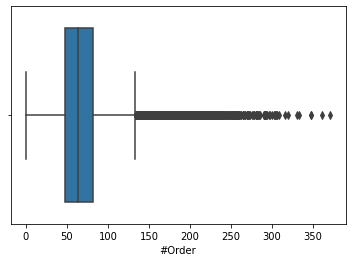

In [39]:
sns.boxplot(df['#Order'])

<AxesSubplot:xlabel='Holiday', ylabel='#Order'>

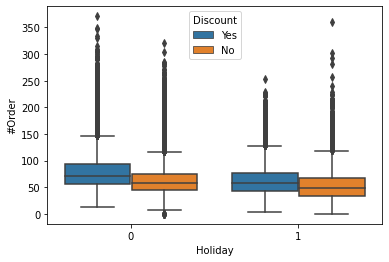

In [40]:
sns.boxplot(y='#Order', x="Holiday", hue = 'Discount', data=df)

/Users/sundara/Documents/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

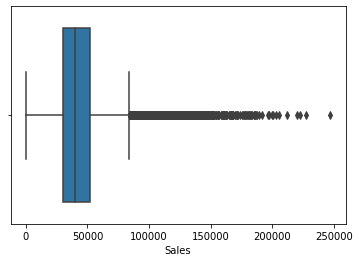

In [41]:
sns.boxplot(df['Sales'])

<AxesSubplot:xlabel='Holiday', ylabel='Sales'>

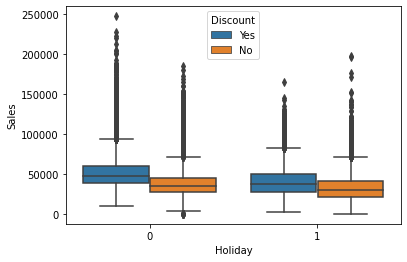

In [42]:
sns.boxplot(y='Sales', x="Holiday", hue = 'Discount', data=df)

In [43]:
store1 = df[df['Store_id']==1]

In [44]:
store1.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,StoreCat,Year,Month,DayOfWeek
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,S1L3R1,2018,1,Monday
607,T1000608,1,S1,L3,R1,2018-01-02,0,Yes,60,42369.00,S1L3R1,2018,1,Tuesday
1046,T1001047,1,S1,L3,R1,2018-01-03,0,Yes,72,50037.00,S1L3R1,2018,1,Wednesday
1207,T1001208,1,S1,L3,R1,2018-01-04,0,Yes,64,44397.00,S1L3R1,2018,1,Thursday
1752,T1001753,1,S1,L3,R1,2018-01-05,0,Yes,63,47604.00,S1L3R1,2018,1,Friday


In [45]:
for store in df['Store_id'].unique().tolist():
    storedf = df[df['Store_id']==store]
    for col in storedf.select_dtypes(include=['category']).columns.tolist():
        cnt = storedf[col].nunique()
        if (cnt != 1) & (col not in ["Holiday", "Discount", "Year", "Month"]):
            print("Store ID {} : Number of levels in {} is {}".format(store, col, cnt))

In [46]:
storedf = df2[df2['Store_id']==1]

In [47]:
storedf.shape

(516, 8)

In [48]:
timeseriesdf = storedf[['Date', 'Sales']]

In [49]:
timeseriesdf.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

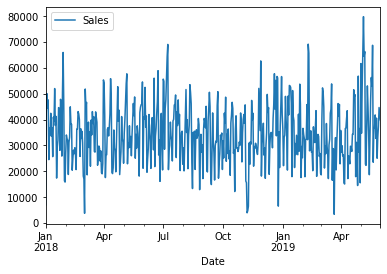

In [50]:
timeseriesdf.plot()

In [51]:
ordertsdf = storedf[['Date', '#Order']]

In [52]:
ordertsdf.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

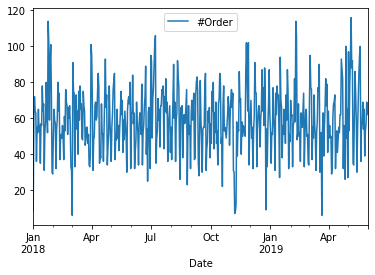

In [53]:
ordertsdf.plot()

In [54]:
corrdf = storedf[['#Order', "Sales"]].corr()

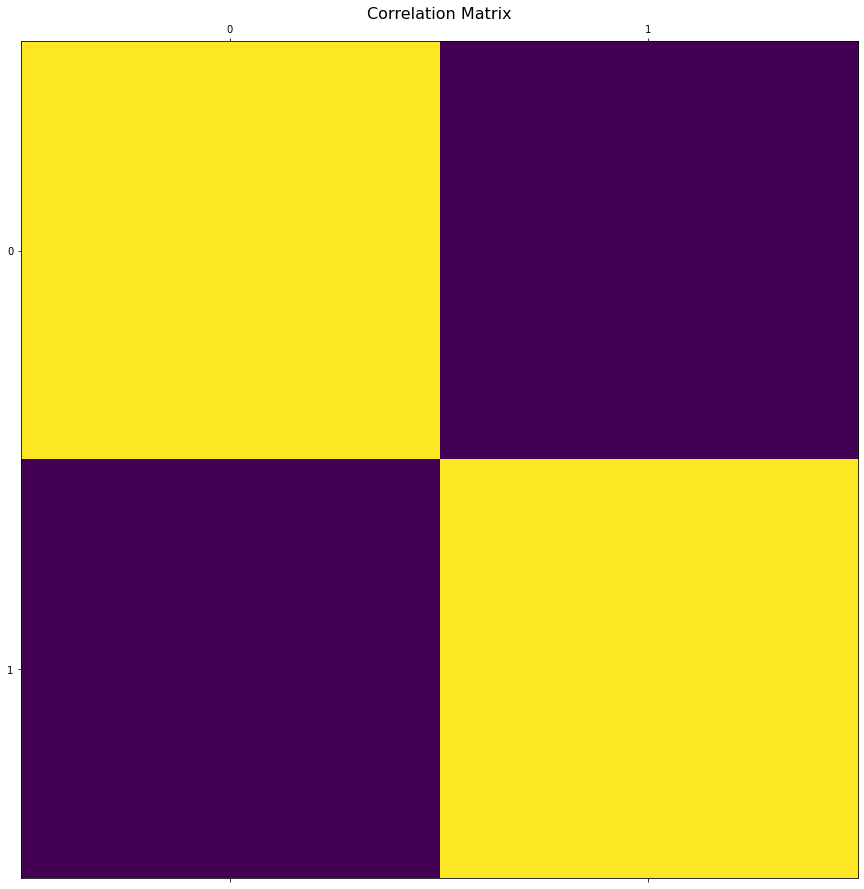

In [55]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corrdf, fignum=f.number)
plt.title('Correlation Matrix', fontsize=16);

In [56]:
corrdf.style.background_gradient(cmap='coolwarm').set_precision(2)


,#Order,Sales
#Order,1.00,0.95
Sales,0.95,1.00


In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
reg = LinearRegression()

In [59]:
X = storedf[['#Order']]
y = storedf[['Sales']]

In [60]:
reg.fit(X, y)

LinearRegression()

In [61]:
print(reg)

LinearRegression()


In [62]:
reg.score(X, y)

0.9071626394368785

In [63]:
reg.coef_

array([[613.08108771]])

In [64]:
reg.intercept_

array([-1549.38291426])

In [65]:
from statsmodels.api import OLS

In [66]:
ols = OLS(y, X)

In [67]:
ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          5.210e+04
Date:                Fri, 17 Sep 2021   Prob (F-statistic):                        0.00
Time:                        23:27:30   Log-Likelihood:                         -4961.2
No. Observations:                 516   AIC:                                      9924.
Df Residuals:                     515   BIC:                                      9929.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
#Order       589.1754      2.581    228.265      0.000     584.105     594.246
==============================================================================
Omnibus:                       62.951   Durbin-Watson:                   0.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              423.276
Skew:                           0.230   Prob(JB):                     1.22e-92
Kurtosis:                       7.413   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
import statsmodels.api as sm

In [69]:
#ADF-test(Original-time-series)
res = sm.tsa.adfuller(storedf['Sales'],regression='ct')
print('p-value:{}'.format(res[1]))

p-value:0.005669638502010902


In [70]:
#ADF-test(differenced-time-series)
res = sm.tsa.adfuller(storedf['Sales'].diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:1.5318720959829444e-13


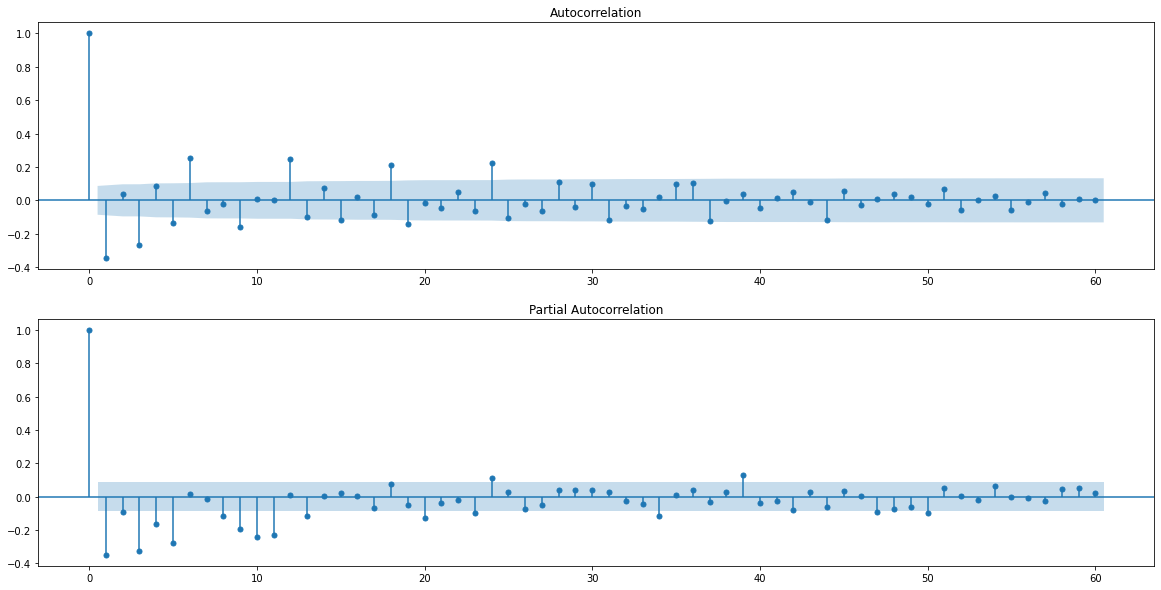

In [81]:
#we use tra.diff()(differenced data), because this time series is unit root process.
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(timeseriesdf.diff().dropna(), lags=60, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(timeseriesdf.diff().dropna(), lags=60, ax=ax[1])
plt.show()

In [72]:
# resDiff = sm.tsa.arma_order_select_ic(timeseriesdf, max_ar=7, max_ma=7, ic='aic', trend='c')
# print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

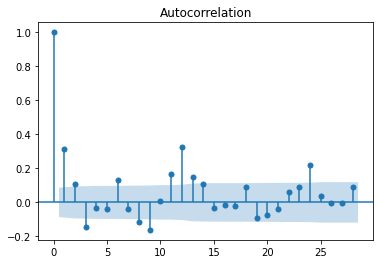

In [77]:
plot_acf(timeseriesdf)
plt.show()

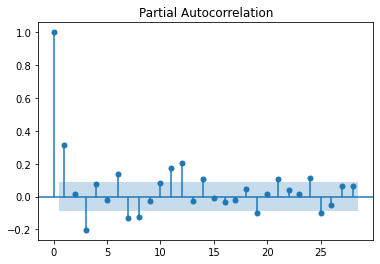

In [80]:
plot_pacf(timeseriesdf)
plt.show()

In [73]:
# aggdf = df.groupby(['Store_id', 'Store_Type', 'Location_Type', 
#             'Region_Code', 'Holiday', 'Discount', 'Year', 'Month'])\
#   .agg({"#Order":np.sum, "Sales":np.sum})

In [83]:
import requests

In [85]:
from io import BytesIO

In [89]:
from datetime import datetime

In [237]:
df2.Date.describe()

<ipython-input-237-322376194a08>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df2.Date.describe()


count                  188340
unique                    516
top       2019-01-22 00:00:00
freq                      365
first     2018-01-01 00:00:00
last      2019-05-31 00:00:00
Name: Date, dtype: object

In [238]:
df3 = df2.set_index("Date")

In [239]:
df3.head()

,Store_id,StoreCat,DayOfWeek,Holiday,Discount,#Order,Sales
Date,,,,,,,
2018-01-01,1,S1L3R1,Monday,1,Yes,9,7011.84
2018-01-01,253,S4L2R1,Monday,1,Yes,60,51789.12
2018-01-01,252,S3L2R1,Monday,1,Yes,42,36868.20
2018-01-01,251,S2L3R1,Monday,1,Yes,23,19715.16
2018-01-01,250,S2L3R4,Monday,1,Yes,62,45614.52


In [152]:
from sklearn.preprocessing import LabelEncoder

In [268]:
le1 = LabelEncoder()
le1.fit(df3.loc[:, 'StoreCat'])
df3['Z'+'StoreCat'] = le1.transform(df3.loc[:, 'StoreCat'])

In [269]:
le2 = LabelEncoder()
le2.fit(df3.loc[:, 'DayOfWeek'])
df3['Z'+'DayOfWeek'] = le2.transform(df3.loc[:, 'DayOfWeek'])

In [270]:
le3= LabelEncoder()
le3.fit(df3.loc[:, 'Discount'])
df3['Z'+'Discount'] = le3.transform(df3.loc[:, 'Discount'])

In [271]:
# colsToEncode = ['StoreCat', 'DayOfWeek', 'Discount']

# for col in colsToEncode:

#     le = LabelEncoder()
#     le.fit(df3.loc[:, col])
#     df3['Z'+col] = le.transform(df3.loc[:, col])

In [272]:
traindf = df3.loc["2018-01-01":"2019-12-31"]
testdf = df3.loc["2019-01-01":"2019-05-31"]


# traindf =storedf[:trainlen] 
# testdf = storedf[trainlen:] 

In [273]:
traindf.shape

(188340, 10)

In [274]:
testdf.shape

(55115, 10)

In [275]:
endog = traindf.loc[:, 'Sales']

In [276]:
exog = sm.add_constant(traindf.loc[:, ('ZDayOfWeek', 'ZStoreCat', 'ZDiscount', 'Holiday')])

In [277]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog, exog, order=(1,0,1))
res = mod.fit(disp=False)
print(res.summary())

/Users/sundara/Documents/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/sundara/Documents/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:               188340
Model:               SARIMAX(1, 0, 1)   Log Likelihood            -2063604.638
Date:                Sat, 18 Sep 2021   AIC                        4127225.276
Time:                        11:42:16   BIC                        4127306.444
Sample:                             0   HQIC                       4127249.228
                             - 188340                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.992e+04    744.321     40.202      0.000    2.85e+04    3.14e+04
ZDayOfWeek  -286.7997     63.744     -4.499      0.000    -411.736    -161.864
ZStoreCat    434.4156      2.141    202.919      0.0

In [278]:
texog = sm.add_constant(testdf.loc[:, ('ZDayOfWeek', 'ZStoreCat', 'ZDiscount', 'Holiday')])

In [279]:
len(texog)

55115

In [280]:
res.forecast(exog=texog, steps=len(texog))

/Users/sundara/Documents/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


188340    33662.384731
188341    51016.471751
188342    32748.517917
188343    64825.764197
188344    50514.682356
              ...     
243450    42758.999007
243451    41068.388213
243452    24995.010280
243453    47537.570825
243454    28470.335238
Name: predicted_mean, Length: 55115, dtype: float64

In [281]:
pred = res.forecast(exog=texog, steps=len(texog))

/Users/sundara/Documents/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [282]:
testdf['pred'] = pred.tolist()

<ipython-input-282-31cf8b4bfba2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['pred'] = pred.tolist()


In [283]:
testdf.head()

,Store_id,StoreCat,DayOfWeek,Holiday,Discount,#Order,Sales,ZStoreCat,ZDayOfWeek,ZDiscount,pred
Date,,,,,,,,,,,
2019-01-01,304,S1L1R4,Tuesday,1,No,57,45634.50,3,5,0,33662.384731
2019-01-01,162,S4L1R2,Tuesday,1,No,63,41877.45,43,5,0,51016.471751
2019-01-01,148,S1L1R2,Tuesday,1,No,30,23139.00,1,5,0,32748.517917
2019-01-01,94,S4L2R2,Tuesday,1,Yes,60,43645.20,47,5,1,64825.764197
2019-01-01,137,S4L1R1,Tuesday,1,No,64,40367.70,42,5,0,50514.682356


In [284]:
from sklearn.metrics import mean_squared_log_error

In [285]:
mean_squared_log_error(testdf['Sales'], testdf['pred'])*1000

172.77081246807188

In [286]:
validdf = pd.read_csv(os.path.join(homedir, "TEST_FINAL.csv"))

In [287]:
validdf.shape

(22265, 8)

In [295]:
validdf.dtypes

ID                       object
Store_id                  int64
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                   int64
Discount                 object
StoreCat                 object
Year                      int64
Month                     int64
DayOfWeek                object
dtype: object

In [290]:
validdf['StoreCat'] = validdf['Store_Type'] + validdf['Location_Type'] + validdf['Region_Code']

In [292]:
validdf['Date'] = pd.to_datetime(validdf['Date'])

In [293]:
validdf['Year'] = validdf['Date'].dt.year
validdf['Month'] = validdf['Date'].dt.month
validdf['DayOfWeek'] = validdf['Date'].dt.dayofweek

In [294]:
validdf['DayOfWeek'] = validdf['DayOfWeek'].apply(lambda x : dayOfWeekDict.get(x))

In [297]:
validdf2 = validdf[['Store_id', "StoreCat", "Date", "DayOfWeek", "Holiday", "Discount"]]

In [298]:
validdf3 = validdf2.set_index("Date")

In [300]:
validdf3['Z'+'StoreCat'] = le1.transform(validdf3.loc[:, 'StoreCat'])
validdf3['Z'+'DayOfWeek'] = le2.transform(validdf3.loc[:, 'DayOfWeek'])
validdf3['Z'+'Discount'] = le3.transform(validdf3.loc[:, 'Discount'])

In [301]:
validdf3.head()

,Store_id,StoreCat,DayOfWeek,Holiday,Discount,ZStoreCat,ZDayOfWeek,ZDiscount
Date,,,,,,,,
2019-06-01,171,S4L2R3,Saturday,0,No,48,2,0
2019-06-01,172,S1L1R1,Saturday,0,No,0,2,0
2019-06-01,173,S4L2R1,Saturday,0,No,46,2,0
2019-06-01,174,S1L1R4,Saturday,0,No,3,2,0
2019-06-01,170,S1L1R2,Saturday,0,No,1,2,0


In [302]:
vexog = sm.add_constant(validdf3.loc[:, ('ZDayOfWeek', 'ZStoreCat', 'ZDiscount', 'Holiday')])

In [304]:
vpred = res.forecast(exog=vexog, steps=len(vexog))

/Users/sundara/Documents/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [305]:
validdf['Sales'] = vpred.tolist()

In [306]:
validdf.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,StoreCat,Year,Month,DayOfWeek,Sales
0,T1188341,171,S4,L2,R3,2019-06-01,0,No,S4L2R3,2019,6,Saturday,62909.390939
1,T1188342,172,S1,L1,R1,2019-06-01,0,No,S1L1R1,2019,6,Saturday,42034.903414
2,T1188343,173,S4,L2,R1,2019-06-01,0,No,S4L2R1,2019,6,Saturday,61995.524124
3,T1188344,174,S1,L1,R4,2019-06-01,0,No,S1L1R4,2019,6,Saturday,43293.194571
4,T1188345,170,S1,L1,R2,2019-06-01,0,No,S1L1R2,2019,6,Saturday,42401.945260


In [309]:
datetime.now().microsecond

510022

In [311]:
validdf[["ID", "Sales"]].to_csv("Submission_{}.csv".format(datetime.now().microsecond), index=None)